In [173]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dss = pd.read_csv('merged_data.csv')

dss.head()



,Zip code,Kitchen,type,subtype,price,bedrooms,Living area,Terrace,Garden,Garden area,landplot,facades,pool,condition,city,province
0,1000,1.0,apartment,flat studio,335000.0,0.0,58.0,0.0,0.0,0.0,NaN,2.0,NaN,just renovated,Brussel,Brussels Hoofdstedelijk Gewest
1,1000,1.0,apartment,penthouse,1400000.0,2.0,220.0,1.0,0.0,0.0,NaN,4.0,NaN,as new,Brussel,Brussels Hoofdstedelijk Gewest
2,1000,1.0,apartment,apartment,289000.0,2.0,80.0,1.0,0.0,0.0,NaN,2.0,NaN,good,Brussel,Brussels Hoofdstedelijk Gewest
3,1000,1.0,apartment,apartment,606000.0,3.0,220.0,0.0,0.0,0.0,NaN,3.0,NaN,to be done up,Brussel,Brussels Hoofdstedelijk Gewest
4,1000,1.0,house,house,580000.0,4.0,179.0,0.0,0.0,0.0,80.0,2.0,NaN,to be done up,Brussel,Brussels Hoofdstedelijk Gewest


In [180]:
ds = pd.read_csv('main_property_data.csv')
ds.drop('Raw num:', inplace=True, axis=1)
dss = pd.read_csv('merged_data.csv')
print(ds.count(), '\n')
print(dss.count())


Locality                                11188
Zip code                                11188
Kitchen                                  9844
Type of property                        11188
Subtype of property                     11188
Price of property in euro               11188
Type of Sale                             2462
Number of bedrooms                      11188
Living area                             11014
Terrace                                  8300
Garden                                   2879
Garden area                              2879
Surface of the land(or plot of land)     5808
Number of facades                        9079
Swimming pool                             348
ID number                               11188
State of the building                    9899
URL                                     11188
dtype: int64 

Zip code       11187
Kitchen        11187
type           11187
subtype        11187
price          11187
bedrooms       11187
Living area    11013
Terrace   

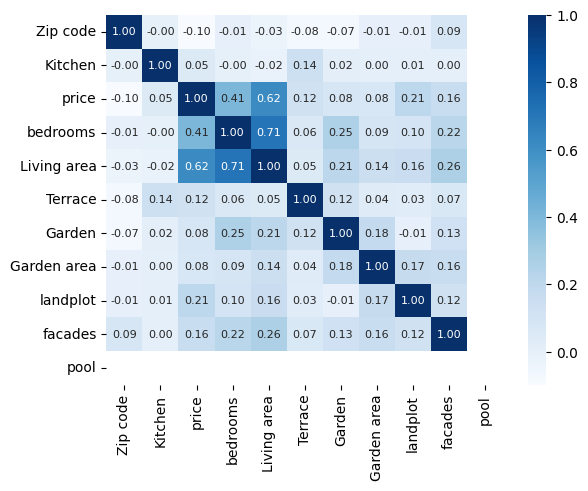

In [156]:

graph_mx = dss.corr(numeric_only=True)
graph = sns.heatmap(graph_mx, annot=True, annot_kws={"size": 8}, fmt='.2f', cmap='Blues')

(0.0, 2000000.0)

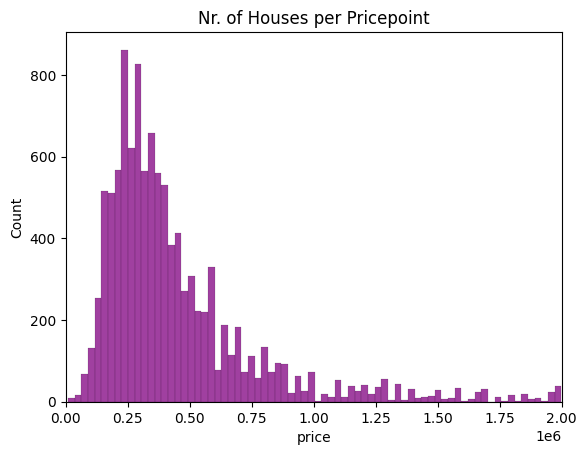

In [155]:
graph = sns.histplot(ds['price'], kde=False, color='purple')
graph.set(title='Nr. of Houses per Pricepoint')
graph.set_xlim(0, 2000000)

[Text(0.5, 0, 'Price(in million)'),
 Text(0, 0.5, 'Housing Sub-Type'),
 Text(0.5, 1.0, 'House Pricing per Sub-Type')]

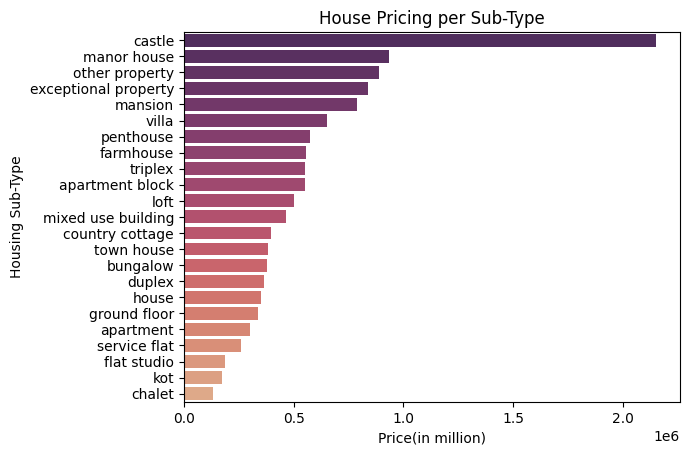

In [171]:
dss = pd.read_csv('merged_data.csv')
test = dss.groupby('subtype')['price'].median().sort_values(ascending=False).index
graph = sns.barplot(data=dss, x='price', y='subtype', order=test, palette='flare_r', estimator='median', errorbar=None)
graph.set(xlabel='Price(in million)', ylabel='Housing Sub-Type', title='House Pricing per Sub-Type')
#graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')

Text(0.53, 0.98, 'Bedrooms to Price Correlation')

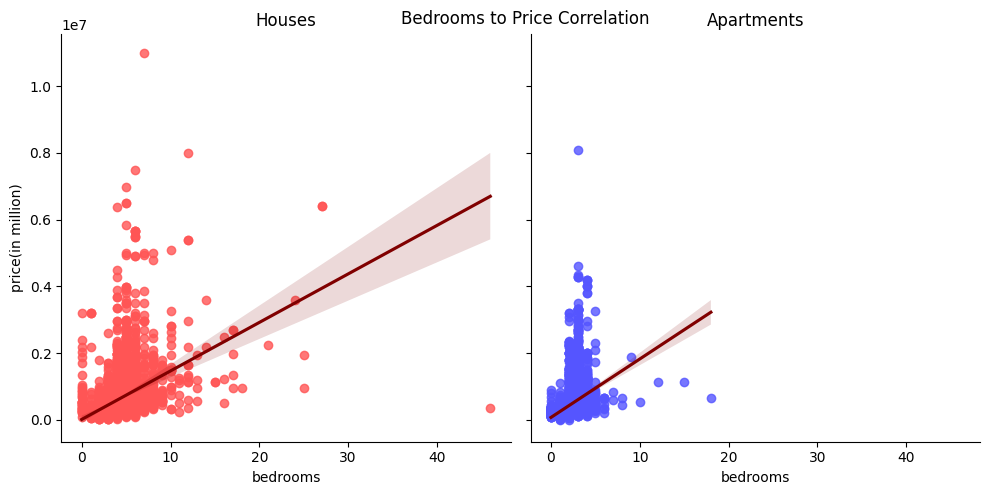

In [135]:
graph = sns.lmplot(x='bedrooms', y='price', data=ds, hue='type', palette='seismic', line_kws={'color': 'maroon'}, col='type', col_order=['house', 'apartment'])
graph.set(xlabel = 'bedrooms', ylabel = 'price(in million)', title= 'bedroom # to price correlation')
graph.fig.axes[0].set_title('Houses')
graph.fig.axes[1].set_title('Apartments')
graph.fig.suptitle('Bedrooms to Price Correlation', x=0.53)

Text(0.53, 0.98, 'Living Area to Price Correlation')

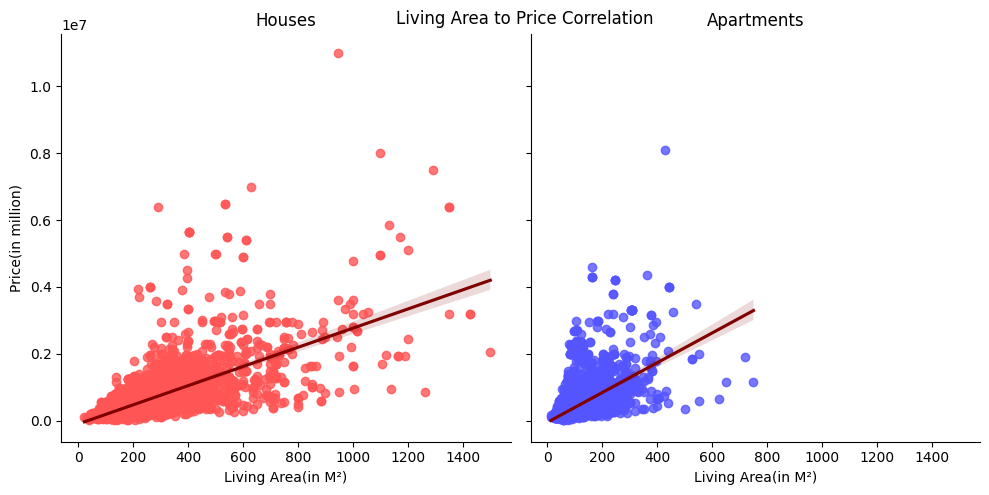

In [129]:
dss = pd.read_csv('merged_data.csv')
graph = sns.lmplot(data=dss, x='Living area', y='price', hue='type', palette='seismic', line_kws={'color': 'maroon'}, col='type', col_order=['house', 'apartment'])
graph.set(xlabel = 'Living Area(in M²)', ylabel = 'Price(in million)', title= 'Living Area to Price')
graph.fig.axes[0].set_title('Houses')
graph.fig.axes[1].set_title('Apartments')
graph.fig.suptitle('Living Area to Price Correlation', x=0.53)

[Text(0.5, 1.0, 'Properties per Province')]

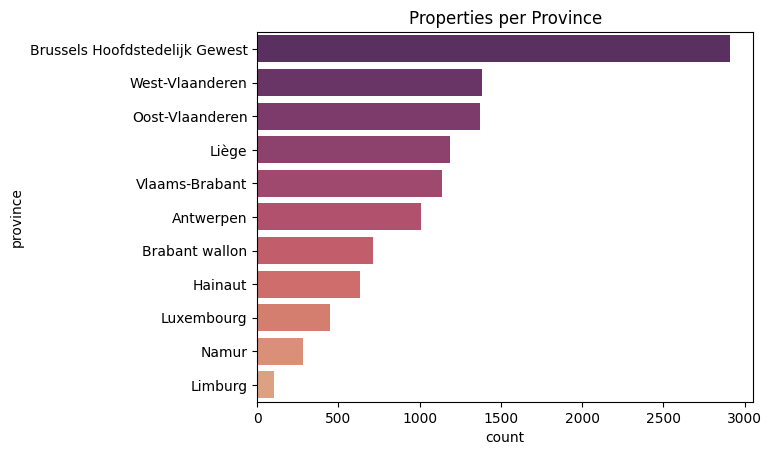

In [136]:
dss = pd.read_csv('merged_data.csv')
graph = sns.countplot(y='province', data=dss, palette='flare_r', order=dss['province'].value_counts().index)
graph.set(title='Properties per Province')


[Text(0.5, 1.0, 'Properties per Province by Type')]

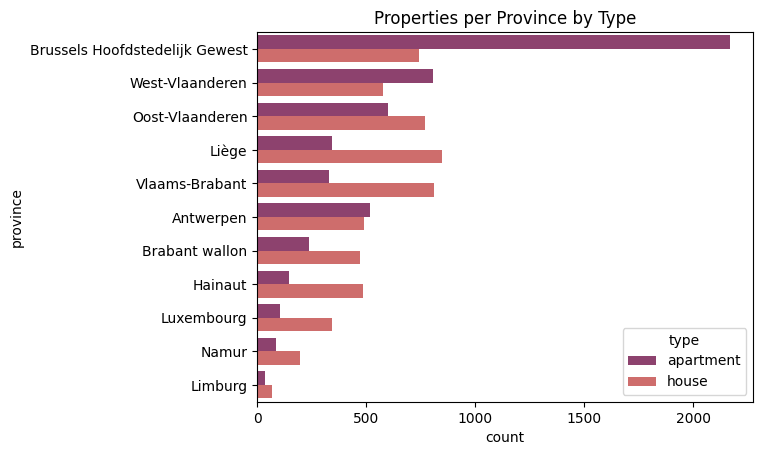

In [164]:
dss = pd.read_csv('merged_data.csv')
overall = dss['province'].value_counts().index
graph = sns.countplot(y='province', data=dss, order=overall, hue='type', palette='flare_r')
graph.set(title='Properties per Province by Type')

[Text(0.5, 1.0, 'Properties per Mean Price')]

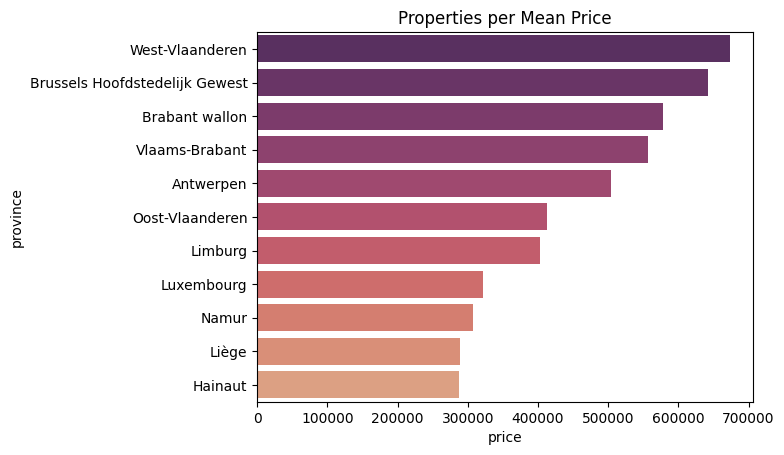

In [165]:
graph = sns.barplot(x='price', y='province', data=dss, palette='flare_r', order=dss.groupby('province')['price'].mean().sort_values(ascending=False).index, estimator='mean', errorbar=None)
graph.set(title='Properties per Mean Price')

[Text(0.5, 1.0, 'Properties per Median Price')]

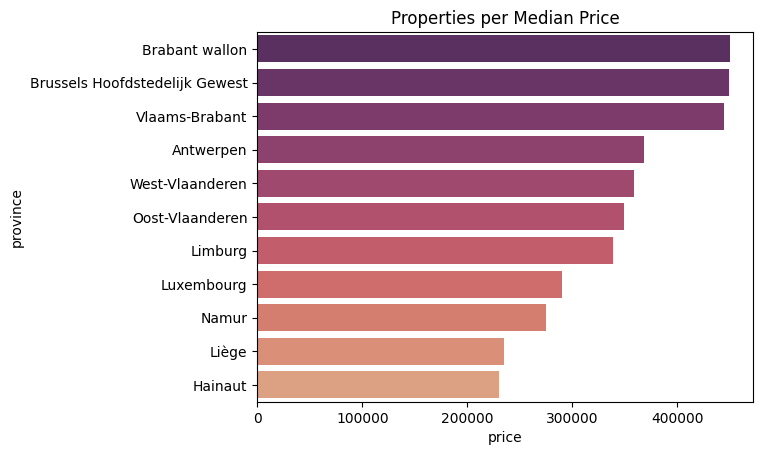

In [166]:
graph = sns.barplot(x='price', y='province', data=dss, palette='flare_r', order=dss.groupby('province')['price'].median().sort_values(ascending=False).index, estimator='median', errorbar=None)
graph.set(title='Properties per Median Price')